In [1]:
#Install omdb library
!pip install omdb

In [2]:
#Dependencies
import pandas as pd
import requests
import json
import omdb
import time
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from config import omdb_key

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Read in csv and create initial dataframe
actors = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#Create input for preferred actor
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Van Dam


In [5]:
#Locate and count all movies selected actor was in
selected_actor = actors[actors["cast"].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)

#Display
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Van Dam has been in 19 movies


In [6]:
#Create dataframe for all movies acted in
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["title"])
movies_played_in

Van Dam has been in the following movies


,title
0,Kung Fu Panda 2
1,Kung Fu Panda 3
2,The Expendables 2
3,Last Action Hero
4,Burlesque
5,Universal Soldier: The Return
6,Street Fighter
7,Knock Off
8,Timecop
9,Maximum Risk


In [7]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

Metascore = {"Rotten Tomatoes Score": [],
             "Year Released": [],
             "Rated": [],
             "Plot": []}

Genre = {"Genre": []}

for movie in selected_actor["title"]:
         
    url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie, omdb_key)
    
    #Print log of movie being processed
    print(f"Now retrieving Movie Data for: " + movie)
    print(url)
    
    #Run requests to API
    movie_data = requests.get(url).json()
    
   # Rating = movie_data["Ratings"]
    
    Metascore["Rotten Tomatoes Score"].append(movie_data["Ratings"][1]["Value"])
    Metascore["Year Released"].append(movie_data["Year"])
    Metascore["Rated"].append(movie_data["Rated"])
    Metascore["Plot"].append(movie_data["Plot"])
    
    Genre["Genre"].append(movie_data["Genre"])
       
    pprint(movie_data)    

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Kung Fu Panda 2
http://www.omdbapi.com/?t=Kung Fu Panda 2&apikey=47006815
{'Actors': 'Jack Black, Angelina Jolie, Dustin Hoffman, Gary Oldman',
 'Awards': 'Nominated for 1 Oscar. Another 5 wins & 46 nominations.',
 'BoxOffice': '$165,230,261',
 'Country': 'USA',
 'DVD': '13 Dec 2011',
 'Director': 'Jennifer Yuh Nelson',
 'Genre': 'Animation, Action, Adventure',
 'Language': 'English',
 'Metascore': '67',
 'Plot': 'Po and his friends fight to stop a peacock villain from conquering '
         'China with a deadly new weapon, but first the Dragon Warrior must '
         'come to terms with his past.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTg4MTQ3NTI3Nl5BMl5BanBnXkFtZTcwNzEzODQ2NA@@._V1_SX300.jpg',
 'Production': 'Paramount Studios/Dreamworks',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.3/10'},
             {

{'Actors': 'Jean-Claude Van Damme, Rob Schneider, Lela Rochon, Paul Sorvino',
 'Awards': 'N/A',
 'BoxOffice': 'N/A',
 'Country': 'Aruba, Hong Kong, USA',
 'DVD': '29 Dec 1998',
 'Director': 'Hark Tsui',
 'Genre': 'Action, Comedy, Thriller',
 'Language': 'English',
 'Metascore': '37',
 'Plot': 'Action star Jean Claude Van Damme plays a fashion designer who must '
         'join forces with a C.I.A. agent to combat terrorism.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BNWZhMzg5M2MtYjU1Mi00YzA3LTgxMTgtMjQzYjM0MDg3YTRkXkEyXkFqcGdeQXVyNDc2NjEyMw@@._V1_SX300.jpg',
 'Production': 'TriStar',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '4.8/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '8%'},
             {'Source': 'Metacritic', 'Value': '37/100'}],
 'Released': '04 Sep 1998',
 'Response': 'True',
 'Runtime': '91 min',
 'Title': 'Knock Off',
 'Type': 'movie',
 'Website': 'http://www.sleepers.com',
 'Writer': 'Steven E. de Souza'

IndexError: list index out of range

In [8]:
#Create final dataframe 
metascore_final = pd.DataFrame(Metascore)

#Merge above dataframe with movie titles
df_merge = pd.merge(metascore_final, movies_played_in, left_index=True, right_index=True)

#Reorder column headers
df_merge2 = df_merge[["title", "Year Released", "Rated", "Rotten Tomatoes Score", "Plot"]]

#Rename column header
final = df_merge2.rename(index=str, columns={"title": "Title"})

#Sort year released value and reset index
final.sort_values(by= "Year Released", ascending=True, inplace=True)
final.reset_index(inplace=True)

#Delete unnecessary column
del final["index"]

#Display
final.head()

,Title,Year Released,Rated,Rotten Tomatoes Score,Plot
0,Halloween,1978,R,93%,Fifteen years after murdering his sister on Ha...
1,Double Impact,1991,R,14%,Twin brothers are separated when their parents...
2,Last Action Hero,1993,PG-13,34%,"With the help of a magic ticket, a young film ..."
3,Nowhere to Run,1993,R,29%,Escaped convict Sam Gillen single handedly tak...
4,Street Fighter,1994,PG-13,18%,Col. Guile and various other martial arts hero...


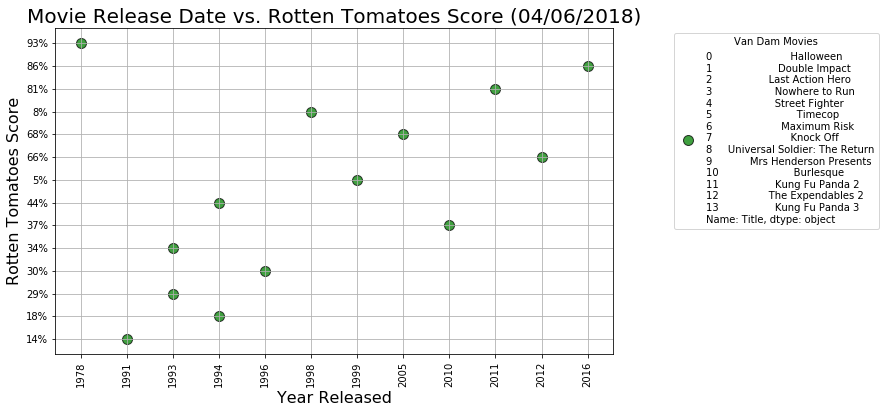

In [9]:
#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatterplot for each "Screen Name" comparing "Tweets Ago" & "Compound Score"
plt.scatter(final["Year Released"], final["Rotten Tomatoes Score"], color= "green", edgecolor= "black",
            label= (final["Title"]), s= 100, alpha = 0.75)

#Aesthetics
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.title("Movie Release Date vs. Rotten Tomatoes Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Rotten Tomatoes Score", fontsize=16)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")

#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Rotten_Tomatoes_Score.png", bbox_inches= "tight")

#Display Output
plt.grid()
plt.show()

### Sentiment Analysis movies actor played in

In [10]:
#Create list for compound sentiment analysis scores
compound_score = []

#Loop through plot summary for each movie
for row in final["Plot"]:
    # Run sentiment analysis
    compound = analyzer.polarity_scores(row)["compound"]
    compound_score.append(compound)
    pos = analyzer.polarity_scores(row)["pos"]
    neu = analyzer.polarity_scores(row)["neu"]
    neg = analyzer.polarity_scores(row)["neg"]
# Print Analysis
    print(row)
    print("Compound Score: %s" % compound)
    print("Positive Score: %s" % pos)
    print("Neutral Score: %s" % neu)
    print("Negative Score: %s" % neg)
    print("\n")

Fifteen years after murdering his sister on Halloween night 1963, Michael Myers escapes from a mental hospital and returns to the small town of Haddonfield to kill again.
Compound Score: -0.8591
Positive Score: 0.043
Neutral Score: 0.696
Negative Score: 0.261


Twin brothers are separated when their parents are murdered but 25 years later they re-unite in order to avenge their parents' death.
Compound Score: -0.8422
Positive Score: 0.0
Neutral Score: 0.713
Negative Score: 0.287


With the help of a magic ticket, a young film fan is transported into the fictional world of his favorite action film character.
Compound Score: 0.7906
Positive Score: 0.308
Neutral Score: 0.692
Negative Score: 0.0


Escaped convict Sam Gillen single handedly takes on ruthless developers determined to evict Clydie - a widow with two young children. Nobody knows who Sam is.
Compound Score: 0.34
Positive Score: 0.094
Neutral Score: 0.906
Negative Score: 0.0


Col. Guile and various other martial arts heroes figh

In [11]:
#Create dataframe for compound scores
compound_score_df = pd.DataFrame(compound_score, columns=["Compound Score"])
compound_score_df.head()

#Create dataframe for movie titles
titles = []
for title in final["Title"]:
    titles.append(title)
titles_df = pd.DataFrame(titles, columns=["Title"])
titles_df.head()

#Merge above dataframes
title_compound = pd.merge(titles_df, compound_score_df, left_index=True, right_index=True)
first_merge = pd.DataFrame(title_compound)
first_merge.head()

,Title,Compound Score
0,Halloween,-0.8591
1,Double Impact,-0.8422
2,Last Action Hero,0.7906
3,Nowhere to Run,0.3400
4,Street Fighter,0.1779


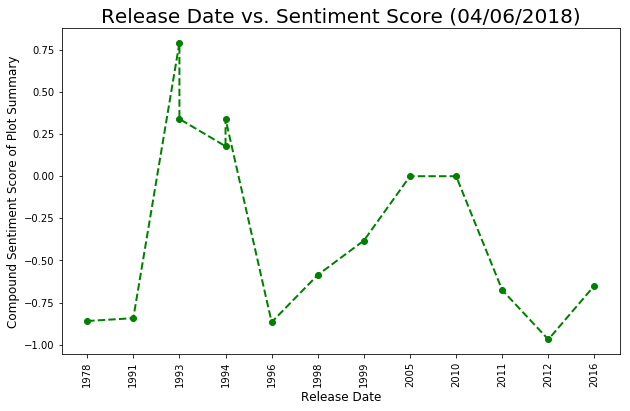

In [12]:
#Set size of bar plots
plt.figure(figsize=(10,6))

plt.plot(final["Year Released"], first_merge["Compound Score"], color= "green", marker= "o", linestyle= "dashed",
linewidth= 2, markersize= 6)

#Aesthetics
plt.title("Release Date vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Release Date", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

In [ ]:
#Set size of bar plots
plt.figure(figsize=(10,6))

#Create bar plots for comparing the results of compound sentiment score for each movie plot
plt.bar(first_merge["Title"], first_merge["Compound Score"], color= "lightblue", edgecolor= "black", width= 1)

#Aesthetics
plt.title("Movie Title vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Movie Title", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Title_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

In [ ]:
#Set size of pie chart
plt.figure(figsize=(10,6))

#Group "final" dataframe by "Rated"
rating = final.groupby("Rated").count()
final_rating = pd.DataFrame(rating)

total_movies = rating["Title"]

#Set pie chart labels
labels = total_movies.index

#Define color and explode values for all pie chart use
colors = ["yellow", "lightgreen", "lightblue", "royalblue"]
#explode = [.00, .00, .00]

#Create pie chart for "% of Total Fares by City Type"
plt.pie(total_movies, startangle = 100, colors = colors, labels = labels, 
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#Save plot as PNG image
plt.savefig("Images/Percent_of_Movies_by_Rating.png", bbox_inches= "tight")

#Format display
plt.title("% of Movies by Movie Rating")
plt.axis("equal")
plt.show()

# Ignore below

In [ ]:
#Export DataFrame as CSV
#movie_info.to_csv("basic_movie_info.csv")

In [ ]:
#Create genre dataframe
movie_genre = pd.DataFrame(Genre)
#Merge to movies_played_in dataframe
title_genre_merge = pd.merge(movie_genre, movies_played_in, left_index=True, right_index=True)
#Display
title_genre_merge.head()

In [ ]:
# Read and display the CSV with Pandas 
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)

#Create df for movie titles and display
movie_info = pd.DataFrame(movies_df[["title",
                                     "release_date",
                                     "revenue",
                                     "runtime",
                                     "overview",
                                     "tagline"]])

movie_info_final = movie_info.rename(index=str, columns={"title": "Movie Title",
                                      "release_date": "Released",
                                      "revenue": "Revenue",
                                      "runtime": "Length (min)",
                                      "overview": "Brief Description",
                                      "tagline": "Tagline"})
movie_info_final.head()

In [ ]:
movie_title = input("What movie are you looking for? ")

In [ ]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")
     
url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_title, omdb_key)
    
#Print log of movie being processed
print(f"Now retrieving Movie Data for: " + movie_title)
print(url)
    
#Run requests to API
movie_data = requests.get(url).json()

pprint(movie_data)